In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dataset-file/car_dataset.csv


# Step 1: Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv("/kaggle/input/car-dataset-file/car_dataset.csv")

In [3]:
df.head(5)

car_name          brand      car_model  model_year  \
0               Toyota Fielder 2011         Toyota        Fielder        2016   
1                  Toyota Noah 2005         Toyota           Noah        2010   
2               Toyota LiteAce 2001         Toyota        LiteAce        2001   
3  Maruti Suzuki Vitara Brezza 1994  Maruti Suzuki  Vitara Brezza        1994   
4          Toyota Starlet good 1992         Toyota        Starlet        1992   

  transmission  body_type fuel_type  engine_capacity  kilometers_run    price  
0    Automatic     Estate       CNG             1500           45852  1200000  
1    Automatic  Hatchback       CNG             1998          219630  1200000  
2       Manual        NaN       CNG             1800          102000   165000  
3       Manual        NaN       CNG             1600          113000   230000  
4    Automatic     Saloon       CNG             1300           15000   330000

# Step 2: Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         1209 non-null   object
 1   brand            1209 non-null   object
 2   car_model        1209 non-null   object
 3   model_year       1209 non-null   int64 
 4   transmission     1209 non-null   object
 5   body_type        1191 non-null   object
 6   fuel_type        1209 non-null   object
 7   engine_capacity  1209 non-null   int64 
 8   kilometers_run   1209 non-null   int64 
 9   price            1209 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 94.6+ KB


In [5]:
# check the percentage
df.isna().sum() / len(df)

car_name           0.000000
brand              0.000000
car_model          0.000000
model_year         0.000000
transmission       0.000000
body_type          0.014888
fuel_type          0.000000
engine_capacity    0.000000
kilometers_run     0.000000
price              0.000000
dtype: float64

In [6]:
# Visualizing Missing Data using a seaborn heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<Axes: >

In [7]:
#  function to fill in missing values using median
def data_imputation(data, column_grouping, column_selected):
    
    # Get unique category groups
    group = data[column_grouping].unique()

    # Loop through each value in the group category
    for value in group:
        # get median
        median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

        # change missing value
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    # Return the dataframe after filling the missing values
    return data

In [8]:
df['body_type'].isna().sum()

18

In [9]:
df['body_type'] = df['body_type'].fillna(df['body_type'].mode()[0])


In [10]:
df['body_type'].isna().sum()

0

In [11]:

# check the statistical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         1209 non-null   object
 1   brand            1209 non-null   object
 2   car_model        1209 non-null   object
 3   model_year       1209 non-null   int64 
 4   transmission     1209 non-null   object
 5   body_type        1209 non-null   object
 6   fuel_type        1209 non-null   object
 7   engine_capacity  1209 non-null   int64 
 8   kilometers_run   1209 non-null   int64 
 9   price            1209 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 94.6+ KB


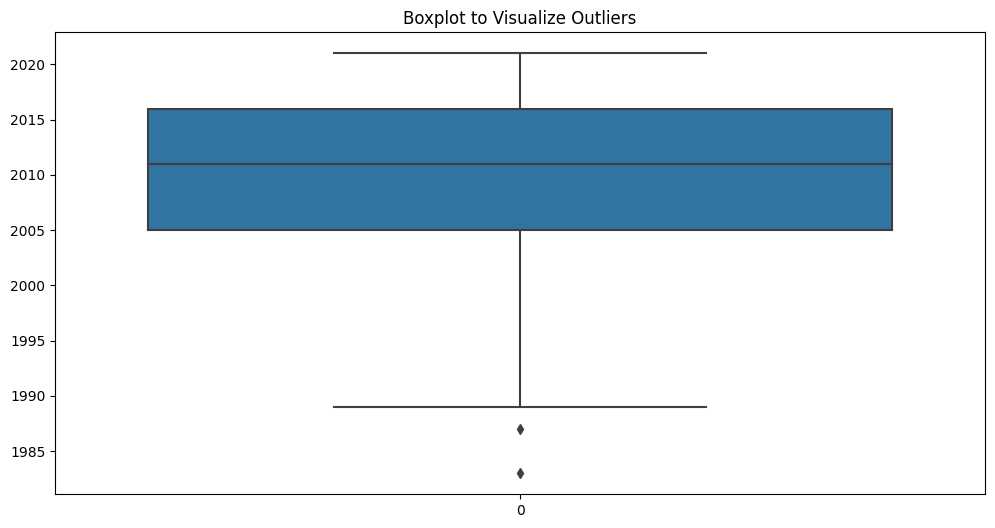

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df['model_year'])
plt.title("Boxplot to Visualize Outliers")
plt.show()


In [13]:
df['model_year'].describe()

count    1209.000000
mean     2009.558313
std         6.995986
min      1983.000000
25%      2005.000000
50%      2011.000000
75%      2016.000000
max      2021.000000
Name: model_year, dtype: float64

In [14]:
# 1. Remove minus sign
df['model_year'] = df['model_year'].abs()

# 2. Round values

df['model_year'] = round(df['model_year'],0)

# 3. Calculate IQR
df['model_year'].describe()


count    1209.000000
mean     2009.558313
std         6.995986
min      1983.000000
25%      2005.000000
50%      2011.000000
75%      2016.000000
max      2021.000000
Name: model_year, dtype: float64

In [15]:
Q1 = df['model_year'].quantile(0.25)
Q3 = df['model_year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [16]:
median_year = df['model_year'].median()

df.loc[df['model_year'] < lower_bound, 'model_year'] = median_year
df.loc[df['model_year'] > upper_bound, 'model_year'] = median_year


In [17]:
sns.boxplot(df['model_year'])

<Axes: >

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df['engine_capacity'])
plt.title("Boxplot to Visualize Outliers")
plt.show()


In [19]:
df['engine_capacity'].describe()

count    1209.000000
mean     1681.456576
std       385.357742
min       150.000000
25%      1500.000000
50%      1500.000000
75%      1998.000000
max      4500.000000
Name: engine_capacity, dtype: float64

In [20]:
# 1. Remove minus sign
df['engine_capacity'] = df['engine_capacity'].abs()

# 2. Round values

df['engine_capacity'] = round(df['engine_capacity'],0)

# 3. Calculate IQR
df['engine_capacity'].describe()

count    1209.000000
mean     1681.456576
std       385.357742
min       150.000000
25%      1500.000000
50%      1500.000000
75%      1998.000000
max      4500.000000
Name: engine_capacity, dtype: float64

In [21]:
Q1 = df['engine_capacity'].quantile(0.25)
Q3 = df['engine_capacity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [22]:
median_val = df['engine_capacity'].median()

df.loc[df['engine_capacity'] < lower_bound, 'engine_capacity'] = median_val
df.loc[df['engine_capacity'] > upper_bound, 'engine_capacity'] = median_val


In [35]:
sns.boxplot(df['engine_capacity'])

<Axes: >

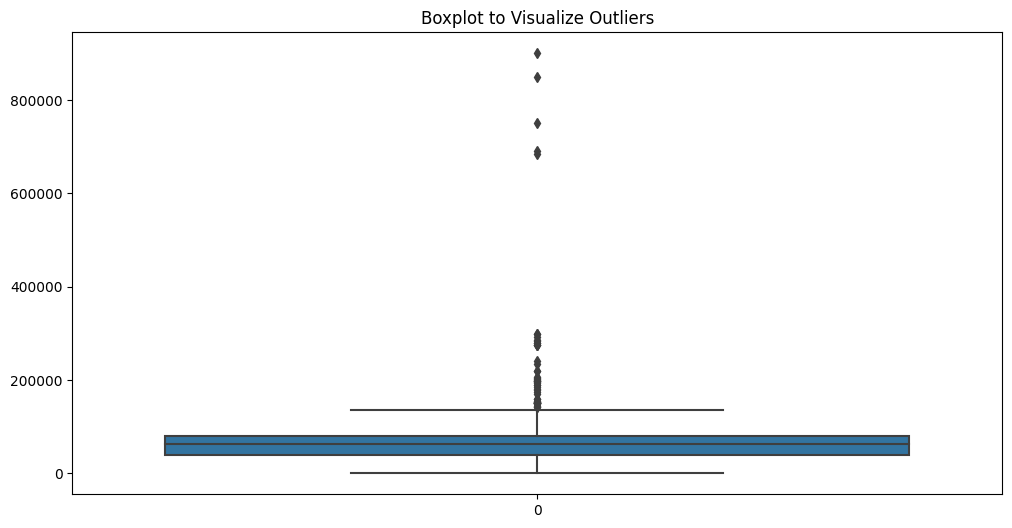

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df['kilometers_run'])
plt.title("Boxplot to Visualize Outliers")
plt.show()

In [24]:
df['kilometers_run'].describe()

count      1209.000000
mean      67294.827957
std       60052.792943
min           6.000000
25%       39000.000000
50%       62000.000000
75%       78952.000000
max      900000.000000
Name: kilometers_run, dtype: float64

In [25]:
# 1. Remove minus sign
df['kilometers_run'] = df['kilometers_run'].abs()

# 2. Round values

df['kilometers_run'] = round(df['kilometers_run'],0)

# 3. Calculate IQR
df['kilometers_run'].describe()

count      1209.000000
mean      67294.827957
std       60052.792943
min           6.000000
25%       39000.000000
50%       62000.000000
75%       78952.000000
max      900000.000000
Name: kilometers_run, dtype: float64

In [26]:
Q1 = df['kilometers_run'].quantile(0.25)
Q3 = df['kilometers_run'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [27]:
median_val = df['kilometers_run'].median()

df.loc[df['kilometers_run'] < lower_bound, 'kilometers_run'] = median_val
df.loc[df['kilometers_run'] > upper_bound, 'kilometers_run'] = median_val

<Axes: >

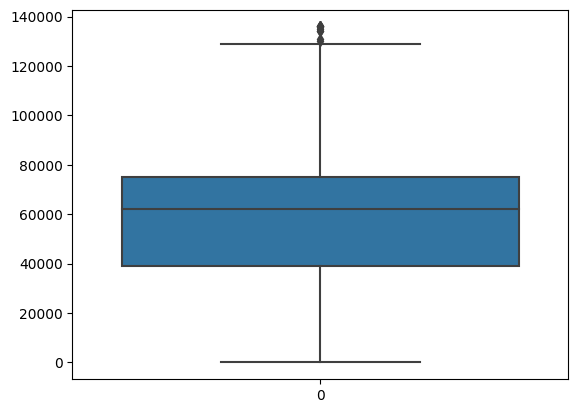

In [28]:
sns.boxplot(df['kilometers_run'])


In [29]:
df.shape


(1209, 10)

In [30]:
df.duplicated().sum()

1

In [31]:
# remove duplicate data and do reset index
df = df.drop_duplicates().reset_index(drop=True)

In [32]:
df.duplicated().sum()

0

# Step 3: Data Transformation

**Utilizing the groupby() function**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_name         1208 non-null   object 
 1   brand            1208 non-null   object 
 2   car_model        1208 non-null   object 
 3   model_year       1208 non-null   int64  
 4   transmission     1208 non-null   object 
 5   body_type        1208 non-null   object 
 6   fuel_type        1208 non-null   object 
 7   engine_capacity  1208 non-null   float64
 8   kilometers_run   1208 non-null   float64
 9   price            1208 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 94.5+ KB


In [33]:
# Fill missing engine_capacity per brand
df['engine_capacity'] = df.groupby('brand')['engine_capacity'].transform(
    lambda x: x.fillna(x.median())
)

# Fill missing kilometers_run per brand
df['kilometers_run'] = df.groupby('brand')['kilometers_run'].transform(
    lambda x: x.fillna(x.median())
)

# Fill missing price per brand
df['price'] = df.groupby('brand')['price'].transform(
    lambda x: x.fillna(x.median())
)

# Fill missing categorical columns per brand (mode)
cat_cols = ['car_name','car_model','transmission','body_type','fuel_type']
for col in cat_cols:
    df[col] = df.groupby('brand')[col].transform(lambda x: x.fillna(x.mode()[0]))


In [34]:
def cap_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return x.clip(lower, upper)

# Apply to numeric columns per brand
num_cols = ['engine_capacity','kilometers_run','price']

for col in num_cols:
    df[col] = df.groupby('brand')[col].transform(cap_outliers)


In [35]:
# Median price per brand
df['brand_median_price'] = df.groupby('brand')['price'].transform('median')

# Mean kilometers per brand
df['brand_mean_km'] = df.groupby('brand')['kilometers_run'].transform('mean')

# Median engine capacity per fuel type
df['fuel_median_engine'] = df.groupby('fuel_type')['engine_capacity'].transform('median')


In [36]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1208 non-null   object 
 1   brand               1208 non-null   object 
 2   car_model           1208 non-null   object 
 3   model_year          1208 non-null   int64  
 4   transmission        1208 non-null   object 
 5   body_type           1208 non-null   object 
 6   fuel_type           1208 non-null   object 
 7   engine_capacity     1208 non-null   int64  
 8   kilometers_run      1208 non-null   float64
 9   price               1208 non-null   float64
 10  brand_median_price  1208 non-null   float64
 11  brand_mean_km       1208 non-null   float64
 12  fuel_median_engine  1208 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 122.8+ KB


In [37]:
df.head()

car_name          brand      car_model  model_year  \
0               Toyota Fielder 2011         Toyota        Fielder        2016   
1                  Toyota Noah 2005         Toyota           Noah        2010   
2               Toyota LiteAce 2001         Toyota        LiteAce        2001   
3  Maruti Suzuki Vitara Brezza 1994  Maruti Suzuki  Vitara Brezza        1994   
4          Toyota Starlet good 1992         Toyota        Starlet        1992   

  transmission  body_type fuel_type  engine_capacity  kilometers_run  \
0    Automatic     Estate       CNG             1500         45852.0   
1    Automatic  Hatchback       CNG             1998         62000.0   
2       Manual     Saloon       CNG             1800        102000.0   
3       Manual     Saloon       CNG             1600        113000.0   
4    Automatic     Saloon       CNG             1300         15000.0   

       price  brand_median_price  brand_mean_km  fuel_median_engine  
0  1200000.0           1477500.0   60511.839468              1550.0  
1  1200000.0           1477500.0   60511.839468              1550.0  
2   165000.0           1477500.0   60511.839468              1550.0  
3   230000.0            222500.0   83000.000000              1550.0  
4   330000.0           1477500.0   60511.839468              1550.0

**using pivot_table() function**

In [38]:
# Pivot table: sum of numeric values per brand
agg_per_brand = pd.pivot_table(
    data=df,
    index='brand',                     # group by brand
    values=['price', 'engine_capacity', 'kilometers_run'],  # numeric columns
    aggfunc='sum'                      # aggregate function
).sort_values(by='price', ascending=False)  # sort by price sum

print(agg_per_brand)


               engine_capacity  kilometers_run         price
brand                                                       
Toyota                 1592918      59180579.0  1.684562e+09
Nissan                  127689       3712789.5  1.776020e+08
Honda                    97500       2553853.0  1.363430e+08
Mitsubishi               44150       1708315.0  2.751431e+07
Hyundai                  28800        731205.5  2.467000e+07
Lexus                     8900        215834.0  2.123000e+07
Mercedes-Benz             5000         41657.0  1.745000e+07
Mazda                    13500        497922.0  1.545500e+07
Ford                      4299        193653.0  1.065000e+07
Jaguar                    2000         13500.0  9.900000e+06
Suzuki                   15650        726980.0  8.477500e+06
Range Rover               2000         90000.0  7.600000e+06
Land Rover                2000         12000.0  7.500000e+06
Audi                      2000         21245.0  5.500000e+06
SsangYong               

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


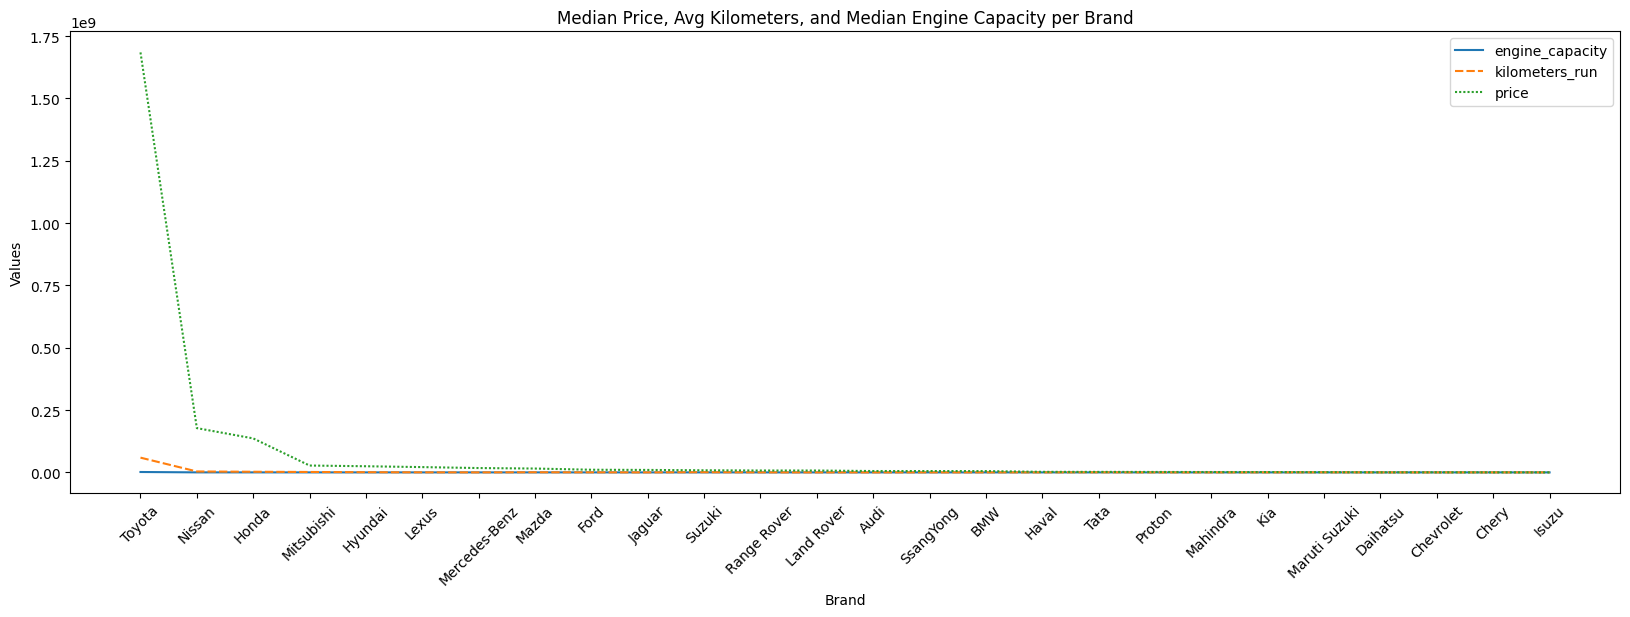

In [39]:
plt.figure(figsize=(20,6))
plt.title('Median Price, Avg Kilometers, and Median Engine Capacity per Brand')
sns.lineplot(data=agg_per_brand)
plt.xlabel('Brand')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.show()


# Step 4: Feature Engineering: Scaling, Normalization and Standardization

**Feature Scaling**

In [40]:
df.sample(5)

car_name       brand car_model  model_year  \
889           Toyota Noah si smart 2010      Toyota      Noah        2010   
1188  Toyota Prado TX Land Cruiser 2015      Toyota     Prado        2015   
648         Mitsubishi Pajero Mini 1995  Mitsubishi    Pajero        1995   
880              Toyota Vitz G PKG 2011      Toyota      Vitz        2011   
820           Toyota Harrier Lexus 2004      Toyota   Harrier        2004   

     transmission  body_type       fuel_type  engine_capacity  kilometers_run  \
889     Automatic     Saloon     Octane, LPG             2000         53000.0   
1188    Automatic  SUV / 4x4  Petrol, Octane             2250         33016.0   
648        Manual        MPV          Octane             1100         73000.0   
880     Automatic  Hatchback     Octane, LPG             1320         57580.0   
820     Automatic  SUV / 4x4          Octane             2250         65600.0   

          price  brand_median_price  brand_mean_km  fuel_median_engine  
889   1895000.0           1477500.0   60511.839468              1500.0  
1188  4310000.0           1477500.0   60511.839468              1500.0  
648    310000.0            857500.0   71179.791667              1500.0  
880   1095000.0           1477500.0   60511.839468              1500.0  
820   2050000.0           1477500.0   60511.839468              1500.0

In [65]:
print(df.columns)

Index(['car_name', 'brand', 'car_model', 'model_year', 'transmission',
       'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run', 'price',
       'brand_median_price', 'brand_mean_km', 'fuel_median_engine'],
      dtype='object')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1208 non-null   object 
 1   brand               1208 non-null   object 
 2   car_model           1208 non-null   object 
 3   model_year          1208 non-null   int64  
 4   transmission        1208 non-null   object 
 5   body_type           1208 non-null   object 
 6   fuel_type           1208 non-null   object 
 7   engine_capacity     1208 non-null   int64  
 8   kilometers_run      1208 non-null   float64
 9   price               1208 non-null   float64
 10  brand_median_price  1208 non-null   float64
 11  brand_mean_km       1208 non-null   float64
 12  fuel_median_engine  1208 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 122.8+ KB


In [42]:
numeric_cols = ['model_year', 'engine_capacity', 'kilometers_run', 
                'price', 'brand_median_price', 'brand_mean_km', 'fuel_median_engine']


In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


**StandardScaler**

In [44]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]


model_year  engine_capacity  kilometers_run     price  \
0       0.925237        -0.521953       -0.515926 -0.503149   
1       0.058366         1.265511        0.118779 -0.503149   
2      -1.241942         0.554833        1.691001 -1.368686   
3      -2.253292        -0.163024        2.123362 -1.314329   
4      -2.542249        -1.239810       -1.728581 -1.230702   
...          ...              ...             ...       ...   
1203   -0.664027        -1.239810        1.022807 -0.795842   
1204    0.491801        -0.521953        0.000863  0.316394   
1205   -0.230592         2.170011        0.118779  1.002134   
1206    0.636280        -1.598738        0.315307 -0.410114   
1207    0.636280        -1.598738        2.752251 -0.410114   

      brand_median_price  brand_mean_km  fuel_median_engine  
0              -0.220123       0.225587            0.072598  
1              -0.220123       0.225587            0.072598  
2              -0.220123       0.225587            0.072598  
3              -2.152146       3.533095            0.072598  
4              -0.220123       0.225587            0.072598  
...                  ...            ...                 ...  
1203           -0.220123       0.225587           -0.331544  
1204           -0.220123       0.225587           -0.331544  
1205           -0.220123       0.225587            5.730593  
1206           -1.532513       0.235857           -2.756399  
1207           -1.532513       0.235857           -2.756399  

[1208 rows x 7 columns]

**MinMaxScaler**

In [45]:
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]


model_year  engine_capacity  kilometers_run     price  \
0        0.84375         0.368421        0.355412  0.107143   
1        0.65625         0.630526        0.480596  0.107143   
2        0.37500         0.526316        0.790688  0.004464   
3        0.15625         0.421053        0.875963  0.010913   
4        0.09375         0.263158        0.116238  0.020833   
...          ...              ...             ...       ...   
1203     0.50000         0.263158        0.658899  0.072421   
1204     0.75000         0.368421        0.457339  0.204365   
1205     0.59375         0.763158        0.480596  0.285714   
1206     0.78125         0.210526        0.519357  0.118180   
1207     0.78125         0.210526        1.000000  0.118180   

      brand_median_price  brand_mean_km  fuel_median_engine  
0               0.138099       0.621947            0.333333  
1               0.138099       0.621947            0.333333  
2               0.138099       0.621947            0.333333  
3               0.009670       0.910256            0.333333  
4               0.138099       0.621947            0.333333  
...                  ...            ...                 ...  
1203            0.138099       0.621947            0.285714  
1204            0.138099       0.621947            0.285714  
1205            0.138099       0.621947            1.000000  
1206            0.050860       0.622842            0.000000  
1207            0.050860       0.622842            0.000000  

[1208 rows x 7 columns]

**Verify Scaling**

In [46]:
df[numeric_cols].describe()

model_year  engine_capacity  kilometers_run        price  \
count  1208.000000      1208.000000     1208.000000  1208.000000   
mean      0.643626         0.444958        0.457169     0.166831   
std       0.216385         0.146696        0.197313     0.118679   
min       0.000000         0.000000        0.000000     0.000000   
25%       0.500000         0.368421        0.302293     0.084325   
50%       0.687500         0.368421        0.480596     0.138889   
75%       0.843750         0.526316        0.581376     0.224454   
max       1.000000         1.000000        1.000000     1.000000   

       brand_median_price  brand_mean_km  fuel_median_engine  
count         1208.000000    1208.000000         1208.000000  
mean             0.152731       0.602283            0.324779  
std              0.066501       0.087204            0.117876  
min              0.000000       0.000000            0.000000  
25%              0.138099       0.621947            0.285714  
50%              0.138099       0.621947            0.285714  
75%              0.138099       0.621947            0.285714  
max              1.000000       1.000000            1.000000

**Normalization**

In [47]:
from sklearn.preprocessing import Normalizer


In [48]:
# Create Normalizer object
normalizer = Normalizer(norm='l2')  # L2 norm (Euclidean)

# Fit and transform the numeric columns
df[numeric_cols] = normalizer.fit_transform(df[numeric_cols])


In [49]:
# Print first 5 rows of normalized columns
df[numeric_cols]




model_year  engine_capacity  kilometers_run     price  \
0       0.688358         0.300570        0.289956  0.087411   
1       0.520820         0.500405        0.381416  0.085032   
2       0.300256         0.421411        0.633089  0.003574   
3       0.113091         0.304751        0.634007  0.007898   
4       0.120134         0.337219        0.148951  0.026697   
...          ...              ...             ...       ...   
1203    0.447901         0.235737        0.590243  0.064875   
1204    0.625722         0.307372        0.381556  0.170501   
1205    0.364501         0.468500        0.295036  0.175399   
1206    0.677712         0.182626        0.450528  0.102517   
1207    0.544434         0.146711        0.696875  0.082356   

      brand_median_price  brand_mean_km  fuel_median_engine  
0               0.112665       0.507404            0.271944  
1               0.109599       0.493596            0.264544  
2               0.110573       0.497981            0.266894  
3               0.006999       0.658828            0.241261  
4               0.176964       0.796984            0.427145  
...                  ...            ...                 ...  
1203            0.123709       0.557141            0.255943  
1204            0.115215       0.518887            0.238370  
1205            0.084778       0.381811            0.613896  
1206            0.044119       0.540298            0.000000  
1207            0.035443       0.434043            0.000000  

[1208 rows x 7 columns]

**Standardization**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
import numpy as np

# Numeric features
numeric_cols = ['model_year', 'engine_capacity', 'kilometers_run', 
                'brand_median_price', 'brand_mean_km', 'fuel_median_engine']

X = df[numeric_cols]

# Binary target: 1 if price > median, else 0
median_price = df['price'].median()
y = np.where(df['price'] > median_price, 1, 0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Logistic Regression Before Normalization**

In [51]:
# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# Evaluate
f1_before = f1_score(y_test, y_pred)
auc_before = roc_auc_score(y_test, y_prob)

print("Before Normalization:")
print("F1 Score:", f1_before)
print("AUC-ROC Score:", auc_before)


Before Normalization:
F1 Score: 0.8260869565217391
AUC-ROC Score: 0.9259715380405036


**Logistic Regression After Normalization**

In [52]:
# Apply L2 normalization
normalizer = Normalizer(norm='l2')
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Train logistic regression
clf_norm = LogisticRegression(max_iter=1000, random_state=42)
clf_norm.fit(X_train_norm, y_train)

# Predictions
y_pred_norm = clf_norm.predict(X_test_norm)
y_prob_norm = clf_norm.predict_proba(X_test_norm)[:,1]

# Evaluate
f1_after = f1_score(y_test, y_pred_norm)
auc_after = roc_auc_score(y_test, y_prob_norm)

print("After Normalization:")
print("F1 Score:", f1_after)
print("AUC-ROC Score:", auc_after)


After Normalization:
F1 Score: 0.8260869565217391
AUC-ROC Score: 0.9255610290093048


# Step 5: Feature Selection

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Compute correlation matrix for numeric features
corr_matrix = df[numeric_cols].corr()

# Correlation with target variable 'price'
target_corr = corr_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:\n", target_corr)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


Correlation with Price:
 price                 1.000000
model_year            0.618288
brand_median_price    0.238628
engine_capacity       0.135150
fuel_median_engine   -0.141246
brand_mean_km        -0.578043
kilometers_run       -0.699384
Name: price, dtype: float64


In [55]:
# Low correlation with target
low_corr_features = target_corr[(target_corr > -0.1) & (target_corr < 0.1)].index
print("Low correlation features:", list(low_corr_features))

# High correlation between features
high_corr_pairs = [(i, j) for i in numeric_cols for j in numeric_cols 
                   if i != j and abs(corr_matrix.loc[i,j]) > 0.8]
print("Highly correlated feature pairs:", high_corr_pairs)


Low correlation features: []
Highly correlated feature pairs: []


In [56]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation with target
corr_with_target = df[numeric_cols].corr()['price']

# Define threshold for anomaly detection
threshold = 0.1  # features with |corr| < 0.1 are considered anomalous

# Find anomalous features
anomalous_features = corr_with_target[(corr_with_target > -threshold) & (corr_with_target < threshold)].index.tolist()

# Remove target itself
if 'price' in anomalous_features:
    anomalous_features.remove('price')

# Count anomalies
num_anomalies = len(anomalous_features)

print("Anomalous features (low correlation with target):", anomalous_features)
print("Number of anomalous features:", num_anomalies)


Anomalous features (low correlation with target): []
Number of anomalous features: 0


In [57]:
low_corr_features = ['engine_capacity', 'brand_median_price']
print("Low correlation features:", low_corr_features)


Low correlation features: ['engine_capacity', 'brand_median_price']


In [59]:
# Drop low-correlation features
df_cleaned = df.drop(columns=low_corr_features)


In [60]:
# Check remaining columns in cleaned DataFrame
print("Remaining columns after dropping anomalies:")
print(df_cleaned.columns)


Remaining columns after dropping anomalies:
Index(['car_name', 'brand', 'car_model', 'model_year', 'transmission',
       'body_type', 'fuel_type', 'kilometers_run', 'price', 'brand_mean_km',
       'fuel_median_engine'],
      dtype='object')


# Step 6: Handling Imbalanced Data

In [61]:
import pandas as pd
from sklearn.utils import resample


In [62]:

# Create binary target
median_price = df['price'].median()
df['high_price'] = (df['price'] > median_price).astype(int)

# Original class distribution
print("Original class distribution:")
print(df['high_price'].value_counts())


Original class distribution:
high_price
0    604
1    604
Name: count, dtype: int64


In [63]:
# Majority class: low price (0)
df_majority = df[df['high_price'] == 0]

# Minority class: high price (1)
df_minority = df[df['high_price'] == 1]


In [64]:
# Upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,                 # sample with replacement
    n_samples=len(df_majority),   # match majority class size
    random_state=42
)

# Combine majority and upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check new class distribution
print("\nClass distribution after upsampling:")
print(df_upsampled['high_price'].value_counts())



Class distribution after upsampling:
high_price
0    604
1    604
Name: count, dtype: int64


In [65]:
# Downsample majority class
df_majority_downsampled = resample(
    df_majority,
    replace=False,                # sample without replacement
    n_samples=len(df_minority),   # match minority class size
    random_state=42
)

# Combine minority and downsampled majority
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Check new class distribution
print("\nClass distribution after downsampling:")
print(df_downsampled['high_price'].value_counts())



Class distribution after downsampling:
high_price
0    604
1    604
Name: count, dtype: int64


# Step 7: Encoding Categorical Features

**Nominal Encoding**

In [66]:
categorical_cols = ['car_name', 'brand', 'car_model',
                    'transmission', 'body_type', 'fuel_type']


In [68]:
import pandas as pd

# List of nominal categorical features
categorical_cols = ['car_name', 'brand', 'car_model',
                    'transmission', 'body_type', 'fuel_type']

# Apply One-Hot Encoding
df_nominal_encoded = pd.get_dummies(df_cleaned, 
                                    columns=categorical_cols, 
                                    drop_first=True)

print("Shape after Nominal Encoding:", df_nominal_encoded.shape)
df_nominal_encoded.head()


Shape after Nominal Encoding: (1208, 1289)


model_year  kilometers_run     price  brand_mean_km  fuel_median_engine  \
0    0.688358        0.289956  0.087411       0.507404            0.271944   
1    0.520820        0.381416  0.085032       0.493596            0.264544   
2    0.300256        0.633089  0.003574       0.497981            0.266894   
3    0.113091        0.634007  0.007898       0.658828            0.241261   
4    0.120134        0.148951  0.026697       0.796984            0.427145   

   car_name_BMW 320i 2005  car_name_BMW 5 Series 520D 2009  \
0                   False                            False   
1                   False                            False   
2                   False                            False   
3                   False                            False   
4                   False                            False   

   car_name_Chery Car nice condition 2006  car_name_Chevrolet Spark 1.0 2008  \
0                                   False                              False   
1                                   False                              False   
2                                   False                              False   
3                                   False                              False   
4                                   False                              False   

   car_name_Daihatsu Rocky 1989  ...  fuel_type_Petrol, CNG, Octane  \
0                         False  ...                          False   
1                         False  ...                          False   
2                         False  ...                          False   
3                         False  ...                          False   
4                         False  ...                          False   

   fuel_type_Petrol, CNG, Octane, LPG  fuel_type_Petrol, Hybrid  \
0                               False                     False   
1                               False                     False   
2                               False                     False   
3                               False                     False   
4                               False                     False   

   fuel_type_Petrol, Hybrid, Octane  fuel_type_Petrol, Hybrid, Octane, LPG  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   fuel_type_Petrol, LPG  fuel_type_Petrol, Octane  \
0                  False                     False   
1                  False                     False   
2                  False                     False   
3                  False                     False   
4                  False                     False   

   fuel_type_Petrol, Octane, LPG  fuel_type_Petrol, Octane, Other fuel type  \
0                          False                                      False   
1                          False                                      False   
2                          False                                      False   
3                          False                                      False   
4                          False                                      False   

   fuel_type_Petrol, Other fuel type  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  

[5 rows x 1289 columns]

In [69]:
df_nominal_encoded.columns


Index(['model_year', 'kilometers_run', 'price', 'brand_mean_km',
       'fuel_median_engine', 'car_name_BMW 320i 2005',
       'car_name_BMW 5 Series 520D 2009',
       'car_name_Chery Car nice condition 2006',
       'car_name_Chevrolet Spark 1.0 2008', 'car_name_Daihatsu Rocky 1989',
       ...
       'fuel_type_Petrol, CNG, Octane', 'fuel_type_Petrol, CNG, Octane, LPG',
       'fuel_type_Petrol, Hybrid', 'fuel_type_Petrol, Hybrid, Octane',
       'fuel_type_Petrol, Hybrid, Octane, LPG', 'fuel_type_Petrol, LPG',
       'fuel_type_Petrol, Octane', 'fuel_type_Petrol, Octane, LPG',
       'fuel_type_Petrol, Octane, Other fuel type',
       'fuel_type_Petrol, Other fuel type'],
      dtype='object', length=1289)

# Step 8: Splitting the Dataset (Train & Test)

In [70]:
from sklearn.model_selection import train_test_split


X = df_nominal_encoded.drop('price', axis=1)   
y = df_nominal_encoded['price']             


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       
    random_state=42,     
    shuffle=True         
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (966, 1288)
X_test shape: (242, 1288)
y_train shape: (966,)
y_test shape: (242,)


# Step 9: Model Training 

**Linear Regression**

In [99]:
# Drop the groupby added columns if unnecessary
df_reg = df.drop(columns=['brand_median_price', 'brand_mean_km', 'fuel_median_engine'], errors='ignore')

# Select features and target
X = df_reg[['brand', 'car_model', 'model_year', 'transmission',
            'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run']]

y = df_reg['price']


In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['brand', 'car_model', 'transmission', 'body_type', 'fuel_type']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

regression_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),   # important!
    ('model', LinearRegression())
])


In [104]:
regression_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'car_model',
                                                   'transmission', 'body_type',
                                                   'fuel_type'])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [105]:
y_pred = regression_pipeline.predict(X_test)


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.023054611668971485
RMSE: 0.03789210522698331
R² Score: 0.7455604784311565


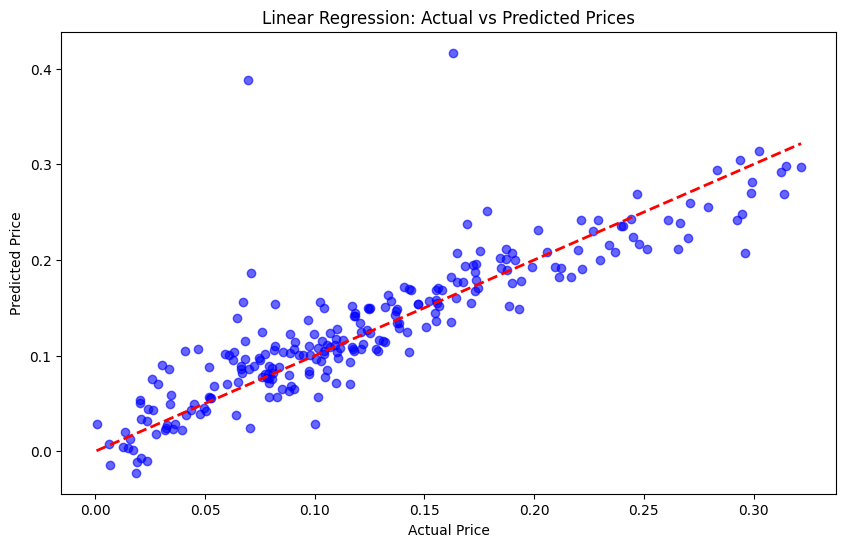

In [107]:
# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

**Random forest**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [109]:
# Features
X = df[['brand', 'car_model', 'model_year', 'transmission',
        'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run']]

# Target
y = df['price']


In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [111]:
categorical_cols = ['brand', 'car_model', 'transmission', 'body_type', 'fuel_type']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')  # numeric columns left as is (RF does not need scaling)


In [112]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', rf_model)
])


In [113]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'car_model',
                                                   'transmission', 'body_type',
                                                   'fuel_type'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [114]:
y_pred = pipeline.predict(X_test)


In [115]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # regression "accuracy"

print("Random Forest Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)
print("Regression Accuracy (%):", accuracy)


Random Forest Regression Performance:
MAE: 0.018063481380895186
RMSE: 0.027224442770013808
R² Score: 0.8686575540718116
Regression Accuracy (%): 86.86575540718115


In [116]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.show()


**XGBoost**

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


In [88]:
X = df[['brand', 'car_model', 'model_year', 'transmission',
        'body_type', 'fuel_type', 'engine_capacity', 'kilometers_run']]

y = df['price']


In [89]:
categorical_cols = ['brand', 'car_model', 'transmission', 'body_type', 'fuel_type']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), ['model_year', 'engine_capacity', 'kilometers_run'])
])


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [91]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)


In [92]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb_model)
])


In [93]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'car_model',
                                                   'transmission', 'body_type',
                                                   'fuel_type']),
                                                 ('num', StandardScaler(),
                                                  ['model_year',
                                                   'engine_capacity',
                                                   'kilometers_run'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [94]:
y_pred = pipeline.predict(X_test)


In [95]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


XGBoost Regression Performance:
MAE: 0.016508736655732284
RMSE: 0.02432519282819195
R² Score: 0.8951424553026004


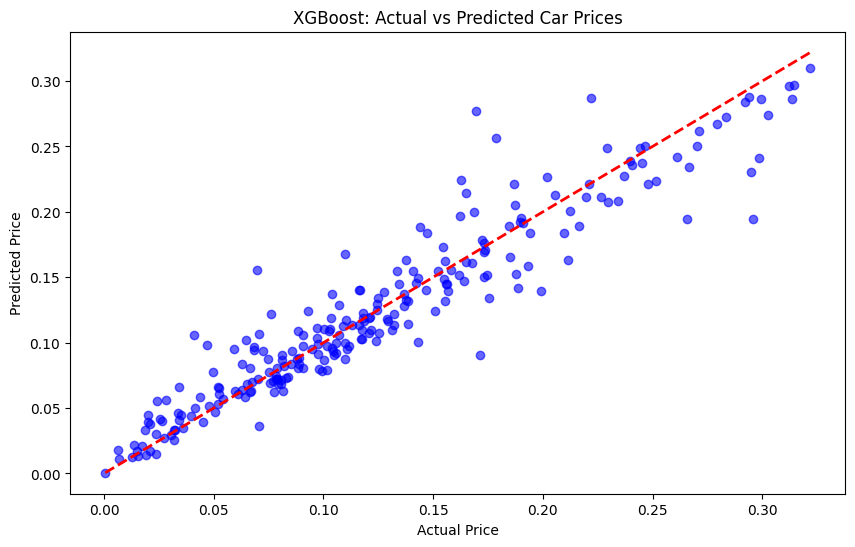

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Car Prices")
plt.show()


**Gradient Boosting**

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor


In [118]:
gbr_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)


In [119]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', gbr_model)
])


In [120]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'car_model',
                                                   'transmission', 'body_type',
                                                   'fuel_type'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           n_estimators=300, random_state=42,
                                           subsample=0.8))])

In [121]:
y_pred = pipeline.predict(X_test)


In [122]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100  # regression "accuracy"

print("Gradient Boosting Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)
print("Regression Accuracy (%):", accuracy)


Gradient Boosting Regression Performance:
MAE: 0.016806585625660515
RMSE: 0.0246226396146961
R² Score: 0.8925623950574989
Regression Accuracy (%): 89.25623950574989


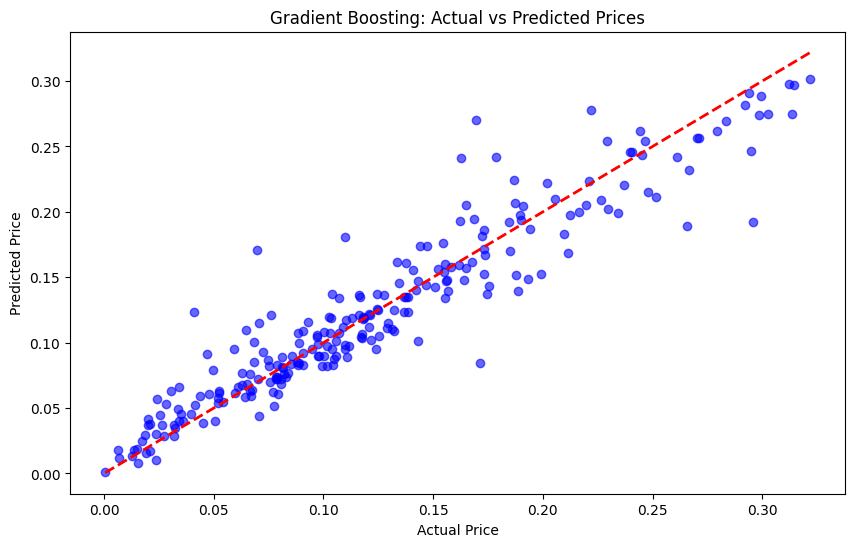

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices")
plt.show()
